## Imports

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
sns.set_style('whitegrid')
sns.set_context('notebook')

## Creating Artificial Data


In [4]:
from sklearn.datasets import make_blobs

Let's create ***data*** that contains: 
- 1000 Samples
- 2 Features
- 5 clusters with std_dev of 1.7

In [5]:
data = make_blobs(n_samples=1000, n_features=2, centers=5, cluster_std=1.7, random_state=101) 

Created *data* is a tuple of 
1. Array of 1000 samples with 2 features
2. Array of 5 centers of cluster (labels)

In [6]:
data[0].shape

(1000, 2)

In [9]:
feat_1 = data[0][:,0]
feat_2 = data[0][:,1]

In [ ]:
data[1].shape

(1000,)

In [ ]:
data[1]

array([0, 0, 4, 4, 0, 3, 4, 4, 4, 3, 0, 1, 3, 4, 1, 3, 3, 3, 3, 2, 2, 1,
       3, 1, 0, 2, 3, 1, 0, 1, 2, 4, 1, 2, 4, 4, 2, 1, 0, 4, 0, 1, 4, 2,
       1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0, 4, 1, 0, 4, 1,
       3, 4, 1, 2, 4, 3, 4, 0, 3, 0, 2, 2, 1, 1, 4, 4, 1, 0, 1, 0, 0, 4,
       4, 4, 4, 1, 3, 0, 2, 3, 4, 3, 3, 3, 2, 4, 2, 3, 4, 0, 3, 1, 1, 2,
       3, 3, 3, 0, 3, 0, 2, 4, 0, 2, 4, 2, 4, 4, 1, 4, 0, 0, 3, 0, 2, 4,
       2, 2, 2, 4, 2, 4, 4, 3, 3, 1, 1, 0, 0, 3, 0, 4, 3, 4, 2, 3, 0, 3,
       4, 1, 0, 3, 2, 2, 1, 4, 2, 1, 0, 4, 3, 2, 2, 4, 3, 0, 1, 2, 3, 1,
       0, 4, 1, 1, 1, 4, 2, 1, 4, 3, 1, 3, 2, 0, 0, 4, 0, 0, 1, 4, 4, 1,
       4, 3, 1, 2, 3, 4, 1, 1, 0, 0, 3, 3, 4, 0, 0, 4, 1, 4, 2, 3, 0, 0,
       4, 1, 2, 0, 3, 0, 2, 4, 4, 0, 4, 0, 1, 2, 4, 1, 4, 3, 4, 2, 4, 2,
       0, 3, 3, 4, 1, 1, 2, 4, 1, 1, 1, 4, 3, 3, 3, 1, 3, 4, 4, 3, 3, 0,
       2, 1, 0, 1, 4, 1, 2, 0, 0, 0, 3, 2, 1, 3, 4, 4, 2, 3, 4, 3, 0, 0,
       4, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,

<h3>Plotting the created data with 5 clusters<h3>


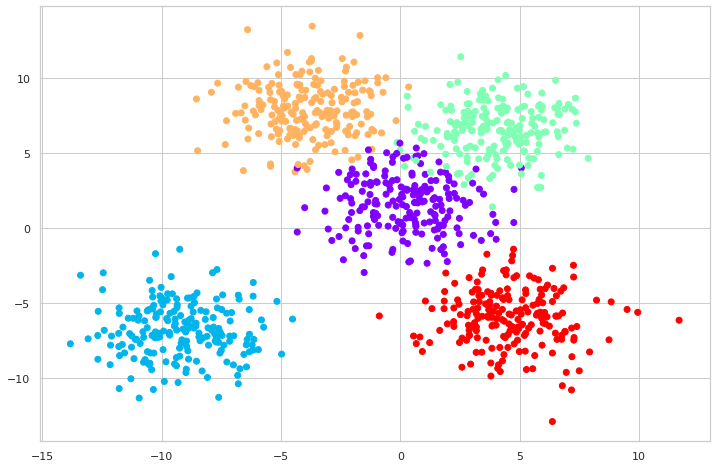

In [10]:
plt.scatter(x=feat_1, y=feat_2, c=data[1], cmap='rainbow')

## KMeans Clustering


**The K Means Algorithm**
- Choose a number of Clusters “K”
- Randomly assign each point to a cluster
- Until clusters stop changing, repeat the following:
  - For each cluster, compute the cluster centroid by
  taking the mean vector of points in the cluster
  - Assign each data point to the cluster for which the
  centroid is the closest

In [11]:
from sklearn.cluster import KMeans

In [12]:
# Kmeans need to know the clusters before hand, As we created the data; we know there are 5 clusters
kmeans = KMeans(n_clusters=5)

In [13]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Centers of predicted clusters

In [14]:
centers = kmeans.cluster_centers_
centers 

array([[-3.86529226,  7.941265  ],
       [-9.22740637, -6.79117513],
       [ 4.58090099, -5.96770276],
       [ 4.16871016,  6.67571109],
       [ 0.30569589,  1.67976644]])

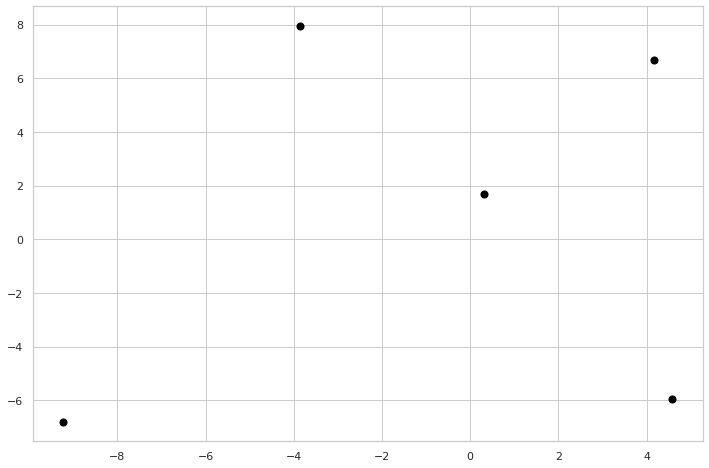

In [17]:
plt.scatter(centers[:,0], centers[:,1], s=50, c='black')

### Predictions

In [15]:
predicted = kmeans.labels_
predicted 

array([4, 4, 2, 2, 4, 0, 2, 2, 2, 0, 4, 1, 0, 2, 1, 0, 0, 0, 0, 3, 3, 1,
       0, 1, 4, 3, 0, 1, 4, 1, 3, 2, 1, 3, 2, 2, 3, 1, 4, 2, 4, 1, 2, 3,
       1, 4, 4, 3, 3, 4, 1, 3, 4, 1, 3, 1, 4, 1, 4, 1, 4, 2, 1, 4, 2, 1,
       0, 2, 1, 3, 2, 0, 2, 4, 0, 4, 3, 4, 1, 1, 2, 2, 1, 4, 1, 4, 4, 2,
       2, 2, 2, 1, 0, 4, 3, 0, 2, 0, 0, 0, 3, 2, 3, 0, 2, 4, 0, 1, 1, 3,
       0, 0, 0, 4, 0, 4, 3, 2, 4, 3, 2, 3, 2, 2, 1, 2, 4, 4, 0, 4, 0, 2,
       3, 3, 3, 2, 3, 2, 2, 0, 0, 1, 1, 4, 4, 0, 4, 2, 0, 2, 3, 0, 4, 0,
       2, 1, 4, 0, 3, 3, 1, 2, 3, 1, 4, 2, 0, 4, 3, 2, 0, 4, 1, 3, 0, 1,
       4, 2, 1, 1, 1, 2, 3, 1, 2, 0, 1, 0, 4, 3, 4, 2, 4, 4, 1, 2, 2, 1,
       2, 0, 1, 3, 0, 2, 1, 1, 4, 4, 0, 0, 2, 4, 4, 2, 1, 2, 3, 0, 4, 4,
       2, 1, 3, 4, 0, 4, 3, 2, 2, 4, 2, 4, 1, 3, 2, 1, 2, 0, 2, 3, 2, 4,
       4, 0, 0, 2, 1, 1, 3, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 4,
       3, 1, 4, 1, 2, 1, 3, 4, 4, 0, 0, 3, 1, 0, 2, 2, 3, 0, 2, 0, 4, 4,
       2, 1, 4, 1, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4,

Generally, ***predicted*** is the final output.

we actually have the labels for this data set in ***data[1]***, but we will NOT use them for the KMeans clustering algorithm, since this is an *unsupervised* learning algorithm.


Fortunately, this original labels can be used to compare with the predicted data
Let's compare the data and check how well KMeans performs.

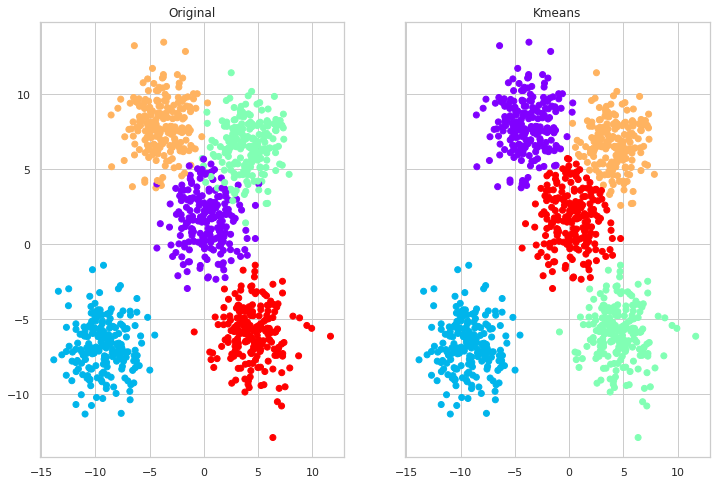

In [16]:
fig, axes = plt.subplots(1,2, sharey=True)
ax1 = axes[0]
ax2 = axes[1]

ax1.set_title('Original')
ax1.scatter(feat_1, feat_2, c=data[1],cmap='rainbow')

ax2.set_title('Kmeans')
ax2.scatter(feat_1, feat_2, c=predicted,cmap='rainbow')

# Ignore the color of plot, Instead focus on how well the model seperated the clusters.